# Project 1: Taylor Swift on Spotify
#### Team Swift: Lucas Monaco, Diya Patel, Janki Patel, Mark Habeb
This project is exploring Taylor Swift's music, as reported by Spotify. Data was pulled from the Spotify API and includes values for features of music that Spotify defines. We will be exploring the relationship between some of these metrics, trying to find a predictor for what makes a song popular, and looking at any potential differences in popularity between original and re-released albums. 
## Introduction & Data Explanation
This dataset has a row for each song from Taylor Swift's Spotify page, with column values:
- song name
- album name
- release date
- unique spotify ID
- tempo (bpm)
- duration (ms)
- loudness (in decibels, averaged over the entire track)
<br>
<br>Also present as column values are numerical metrics which are generated by Spotify using their algorithms or other internal determinations. They define these values as:
<br>
- acousticness, a measure of confidence from 0.0 to 1.0 of whether the track is acoustic, where 1.0 represents high confidence the track is acoustic.
- danceability, how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- energy, a measure from 0.0 to 1.0 that represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. Features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- instrumentalness, predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- liveness, detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- speechiness, detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- valence, a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- popularity, a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. 
### Research questions:
1. Is there any relationship/correlation between tempo and valence (musical positiveness)? 
2. Is there any relationship/correlation between energy and danceability?
3. What is the difference in popularity between newer releases of albums (specifically albums that were re-released as “Taylor’s Version”) as compared to the originals?
4. Which, if any, of the numerical metrics that Spotify assigns to songs are good predictors (that is, strongly related in regression) for popularity?

In [21]:
#import dependencies
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import linregress

In [22]:
# read in data from cleaned csv
swift_df = pd.read_csv('swift_spotify_clean.csv')
# display the first 5 rows of data as example
swift_df.head()

,Unnamed: 0,name,album,release_date,id,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Mine (Taylor's Version),Speak Now (Taylor's Version),2023-07-07,7G0gBu6nLdhFDPRLc0HdDG,0.00444,0.646,0.783,0.000001,0.171,-2.846,0.0356,121.080,0.490,83,231706
1,1,Sparks Fly (Taylor’s Version),Speak Now (Taylor's Version),2023-07-07,3MytWN8L7shNYzGl4tAKRp,0.02510,0.588,0.758,0.000000,0.131,-2.347,0.0305,114.991,0.387,81,261230
2,2,Back To December (Taylor's Version),Speak Now (Taylor's Version),2023-07-07,79uDOz0zuuWS7HWxzMmTa2,0.00621,0.497,0.635,0.000000,0.117,-3.927,0.0273,142.063,0.203,84,294189
3,3,Speak Now (Taylor's Version),Speak Now (Taylor's Version),2023-07-07,5xXqyjLicvEpch72qEryFT,0.24800,0.727,0.677,0.000000,0.143,-2.871,0.0325,118.995,0.639,80,242473
4,4,Dear John (Taylor's Version),Speak Now (Taylor's Version),2023-07-07,1zU8j1x3yi9xalMF96pzKp,0.02360,0.419,0.470,0.000000,0.163,-5.016,0.0296,119.294,0.133,80,405906


## Research question 1: Is there any relationship/correlation between tempo and valence (musical positiveness)? 

In [24]:
#calculate the correlation between 'tempo' and 'valence'
correlation = swift_df['tempo'].corr(swift_df['valence'])

#summary statistics
summary_stats = swift_df[['tempo', 'valence']].describe()

print(f'correlation between tempo and valence:{correlation}')

correlation between tempo and valence:0.12114750009973596


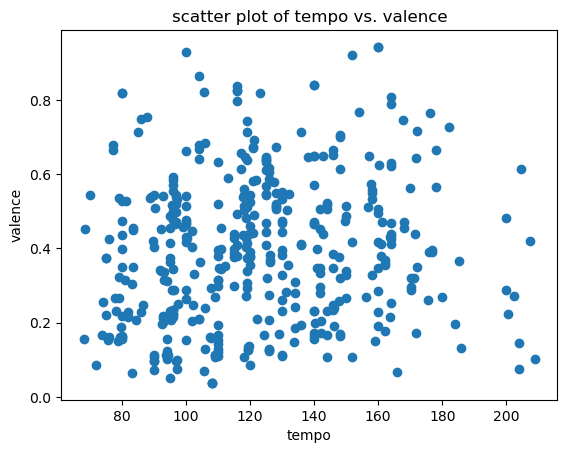

In [25]:
#create scatter plot
plt.scatter(swift_df['tempo'], swift_df['valence'])
plt.xlabel('tempo')
plt.ylabel('valence')
plt.title('scatter plot of tempo vs. valence')
plt.show()


Answer: there is very little correlation between tempo and valence. The r value is 0.12, which means very weak positive correlation. The scatterplot shows no shape that would indicate correlation either.

## Research question 2: Is there any relationship/correlation between energy and danceability?

In [26]:
#calculate the correlation between 'energy' and 'danceability'
correlation = swift_df['energy'].corr(swift_df['danceability'])

#summary statistics
summary_stats = swift_df[['energy', 'danceability']].describe()

print(f'correlation between energy and danceability:{correlation}')

correlation between energy and danceability:-0.01574624994721657


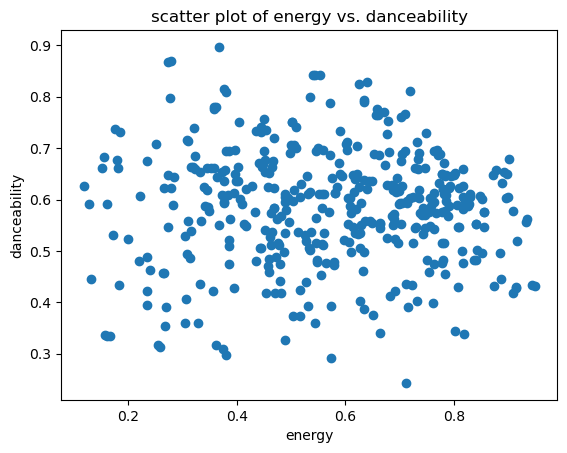

In [27]:
#create scatter plot
plt.scatter(swift_df['energy'], swift_df['danceability'])
plt.xlabel('energy')
plt.ylabel('danceability')
plt.title('scatter plot of energy vs. danceability')
plt.show()

Answer: there is almost no correlation between energy and danceability, with an r value of just -0.016. The negative value is interesting, but a number so close to zero means that there is basically no correlation to speak of. The scatterplot also shows very little shape or trend that might indicate a relationship.

## Research question 3: what is the difference in popularity between albums re-released as "Taylor's Version" and the originals?

"Taylor's Version" are re-releases of albums that Taylor Swift recorded after losing the rights to the original music, when her old record label was sold. She did this to maintain ownership over her music, as the previous versions are now owned by the buyer of her old record label, rather than by Taylor herself. The new versions of the albums are re-recorded versions of the songs from the original albums, as well as new recordings for songs which were considered or written for the original albums but ultimately not included. There are three albums which have been re-released as "Taylor's Version" so far, Fearless, Speak Now, and Red, and a fourth album, 1989 (Taylor's Version), will be coming out later this month.

album
Fearless (Platinum Edition)    48.157895
Fearless (Taylor's Version)    70.307692
Name: popularity, dtype: float64


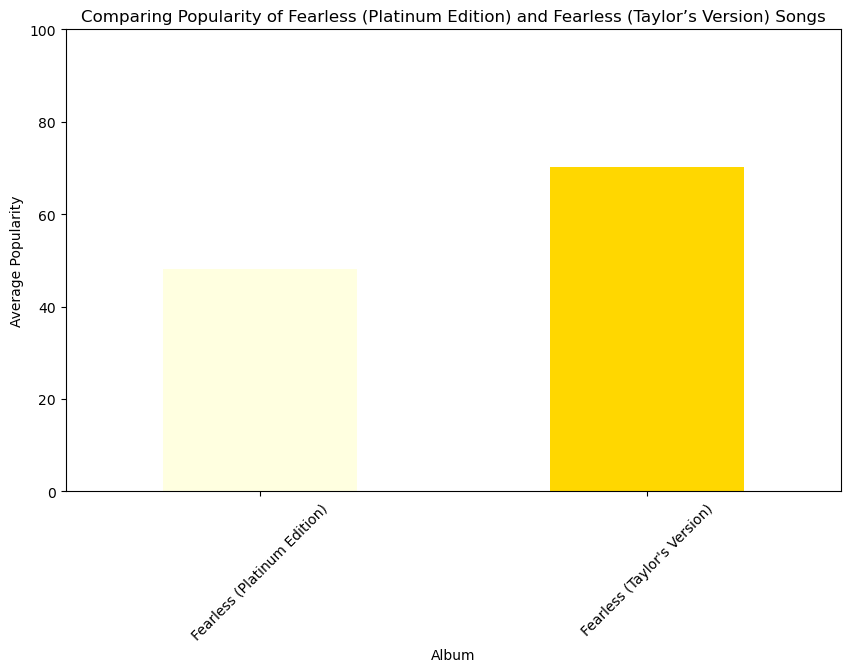

In [28]:
# Filter the DataFrame
fearless_songs = swift_df[swift_df['album'].isin(["Fearless (Platinum Edition)", "Fearless (Taylor's Version)"])]

# Group by album and calculate mean popularity
avg_popularity = fearless_songs.groupby('album')['popularity'].mean()

# Print avg_popularity to ensure it contains data
print(avg_popularity)

# Create a bar graph
avg_popularity.plot(kind='bar', figsize=(10, 6), color=['#FFFFE0', '#FFD700'])

# Customize the plot
plt.title('Comparing Popularity of Fearless (Platinum Edition) and Fearless (Taylor’s Version) Songs')
plt.xlabel('Album')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Since popularity scores range from 0-100
plt.show()

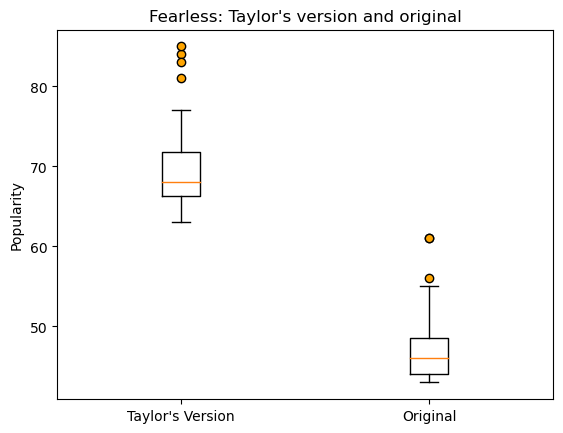

In [29]:
# box plot comparing popularity for two versions of fearless

# create list of lists containing the data
fearless = [
    swift_df[swift_df['album'] == "Fearless (Taylor's Version)"]['popularity'],
    swift_df[swift_df['album'] == "Fearless (Platinum Edition)"]['popularity']
]

# call boxplot method 
plt.boxplot(fearless, flierprops={'marker': 'o', 'markerfacecolor': 'orange'})

# label the boxes, y axis and add title
plt.xticks([1,2], ["Taylor's Version", "Original"])
plt.ylabel("Popularity")
plt.title("Fearless: Taylor's version and original")

# show the plot
plt.show()

album
Speak Now (Deluxe Package)      53.200000
Speak Now (Taylor's Version)    79.363636
Name: popularity, dtype: float64


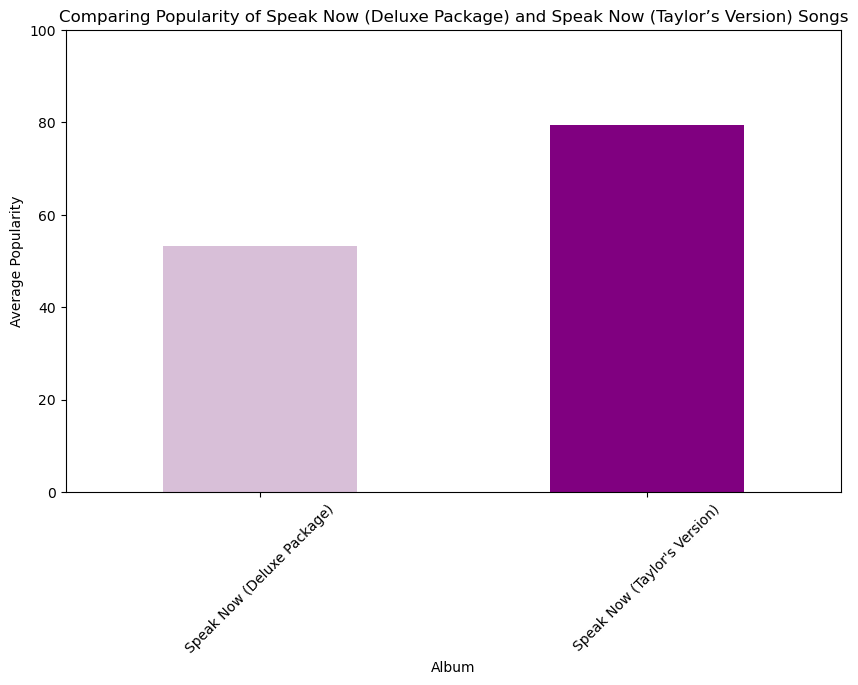

In [30]:
# Filter the DataFrame
# Filtering condition
condition = swift_df['album'].isin(["Speak Now (Deluxe Package)", "Speak Now (Taylor's Version)"])

# Apply condition to DataFrame
speak_now_songs = swift_df[condition]

# Group by album and calculate mean popularity
avg_popularity = speak_now_songs.groupby('album')['popularity'].mean()

# Print avg_popularity to ensure it contains data
print(avg_popularity)

# Create a bar graph
avg_popularity.plot(kind='bar', figsize=(10, 6), color=['#D8BFD8', '#800080'])  # Changed the colors to differentiate

# Customize the plot
plt.title('Comparing Popularity of Speak Now (Deluxe Package) and Speak Now (Taylor’s Version) Songs')
plt.xlabel('Album')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Since popularity scores range from 0-100

# Show the plot
plt.show()

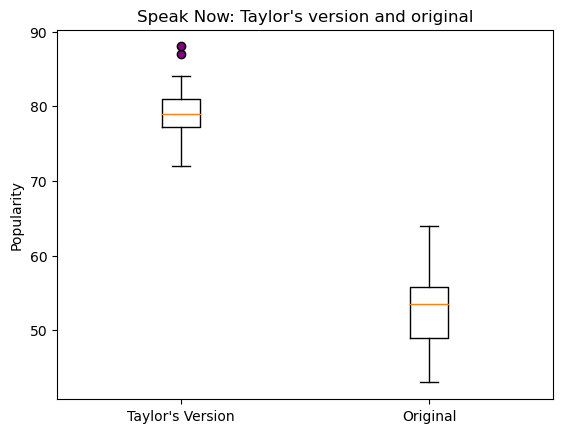

In [31]:
# box plot comparing popularity for two versions of speak now

# create list of lists containing the data
speak_now = [
    swift_df[swift_df['album'] == "Speak Now (Taylor's Version)"]['popularity'],
    swift_df[swift_df['album'] == "Speak Now (Deluxe Package)"]['popularity']
]

# create the box plot 
plt.boxplot(speak_now, flierprops={'marker': 'o', 'markerfacecolor': 'purple'})

# add the labels to boxes and y axis, and title
plt.xticks([1,2], ["Taylor's Version", "Original"])
plt.ylabel("Popularity")
plt.title("Speak Now: Taylor's version and original")

# show the plot
plt.show()

album
Red (Deluxe Edition)      50.944444
Red (Taylor's Version)    72.766667
Name: popularity, dtype: float64


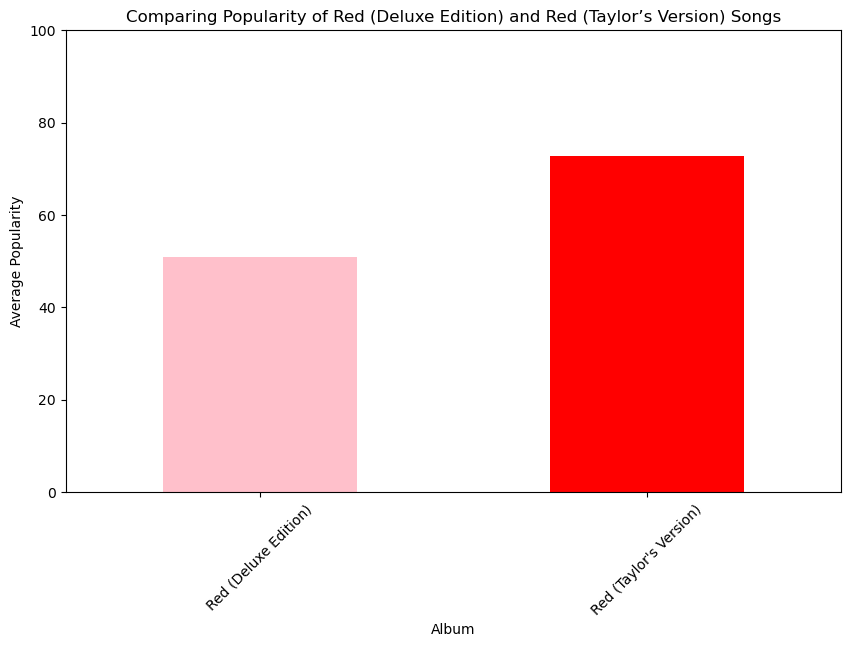

In [32]:
# Filter the DataFrame
# Filtering condition
condition = swift_df['album'].isin(["Red (Deluxe Edition)", "Red (Taylor's Version)"])

# Apply condition to DataFrame
red_songs = swift_df[condition]  # Changed variable name to match the albums

# Group by album and calculate mean popularity
avg_popularity = red_songs.groupby('album')['popularity'].mean()

# Print avg_popularity to ensure it contains data
print(avg_popularity)

# Create a bar graph
avg_popularity.plot(kind='bar', figsize=(10, 6), color=['#FFC0CB', '#FF0000'])  # Changed the colors to match the album theme

# Customize the plot
plt.title('Comparing Popularity of Red (Deluxe Edition) and Red (Taylor’s Version) Songs')
plt.xlabel('Album')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Since popularity scores range from 0-100

# Show the plot
plt.show()

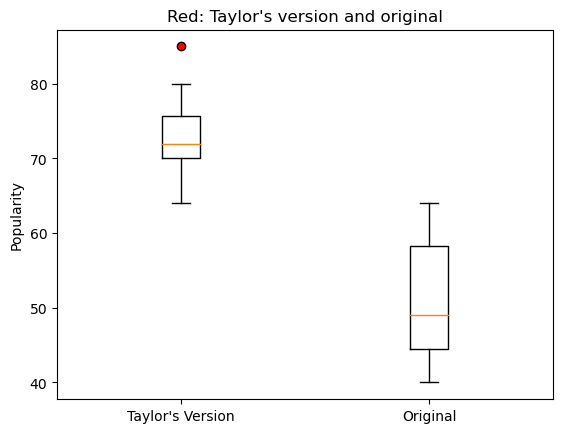

In [33]:
# box plot comparing popularity for two versions of red

# create list of lists containing the data
red = [
    swift_df[swift_df['album'] == "Red (Taylor's Version)"]['popularity'],
    swift_df[swift_df['album'] == "Red (Deluxe Edition)"]['popularity']
]

# call the boxplot method
plt.boxplot(red, flierprops={'marker': 'o', 'markerfacecolor': 'red'})

# label the boxes and y axis, add title
plt.xticks([1,2], ["Taylor's Version", "Original"])
plt.ylabel("Popularity")
plt.title("Red: Taylor's version and original")

# show the plot
plt.show()

Answer: Yes, there is a large difference in popularity between the original and Taylor's Version of the albums Speak Now, Red, and Fearless. All three boxplots show the Taylor's Version of the albums having much higher popularity for the entire album, with the distribution overall being much higher for Taylor's Version, and comparatively quite low in popularity for the original. Also interesting are the outliers, with all of the Taylor's Version albums having at least one outlier above the rest of the data, and Fearless with multiple outliers above the rest of the data in both Taylor's Version and the original. The bar charts also show that Taylor's version have much higher average popularity as well, when compared with the originals.
<br> Something that might be affecting the popularity values of older tracks is that this dataset only includes data from when a track is played on Spotify. The original versions of these albums were released between 2008 and 2012, and while Spotify did exist at the time, it was not nearly as ubiquitous as it was today, meaning generally popular tracks of the time may not have had as many plays on Spotify as similarly popular tracks today would. 

## Research question 4: which, if any, numerical metrics that Spotify tracks are good predictors for popularity?

In [34]:
# define a function to speed up repetitive plotting

# this function takes in arguments xcol and ycol, which are the x values and y values for the regression and plotting
# as well as xlab and ylab, the labels of these columns for the plot
# it will compute the regression, print the r value and the equation for the regression line
# then plot a scatterplot of the data with the regression line added, using x and y labels for the axes and the title
# it returns a list of the line equation (as a string) and the r value (as a number)
def linregplot(xcol, ycol, xlab, ylab):
    # call linregress from scipy stats using the x and y passed in as arguments
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xcol, ycol)
    
    # define line equation string, using slope and intercept from linear regression
    line_eq_label = f'y = {slope:.2f}x + {intercept:.2f}'
    
    # print the r value and line equation
    print(f'The r-value is {rvalue:.3f}')
    print(f'The regression line equation is: {line_eq_label}')
    
    # make the scatterplot
    plt.scatter(x=xcol, y=ycol)
    
    # add x and y labels, title to the plot
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(f'{xlab} vs {ylab}')
    
    # add the line from the linear regression to the plot
    plt.plot(xcol, slope*xcol + intercept, color='red')
    
    # show the plot
    plt.show()
    
    # return the line equation and the r value in a list so that I can display them later
    return [line_eq_label, rvalue]

The r-value is -0.052
The regression line equation is: y = -4.39x + 63.03


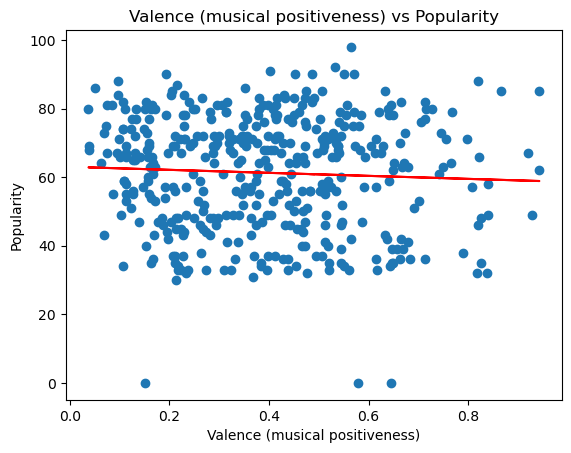

In [35]:
# use function defined above to calculate and plot regression for valence and popularity
valence_reg = linregplot(swift_df['valence'], swift_df['popularity'], "Valence (musical positiveness)", "Popularity")

The r-value is -0.006
The regression line equation is: y = -0.00x + 61.68


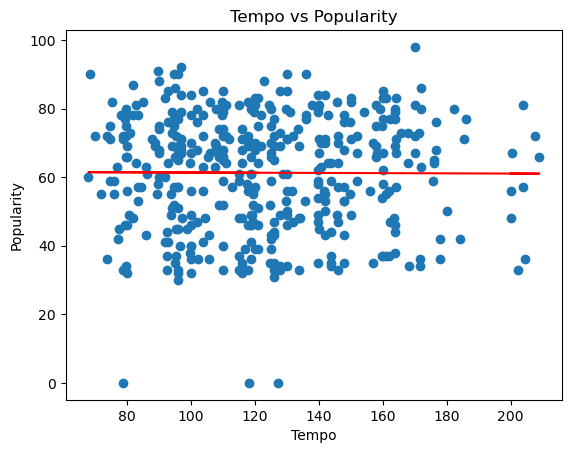

In [36]:
# second regression: tempo vs popularity
tempo_reg = linregplot(swift_df['tempo'], swift_df['popularity'], "Tempo", "Popularity")

The r-value is -0.031
The regression line equation is: y = -2.61x + 62.79


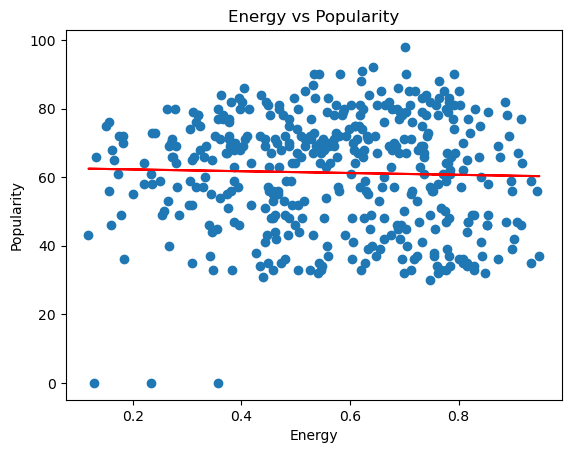

In [37]:
# third regression: energy vs pop
energy_reg = linregplot(swift_df['energy'], swift_df['popularity'], "Energy", "Popularity")

The r-value is 0.090
The regression line equation is: y = 13.31x + 53.53


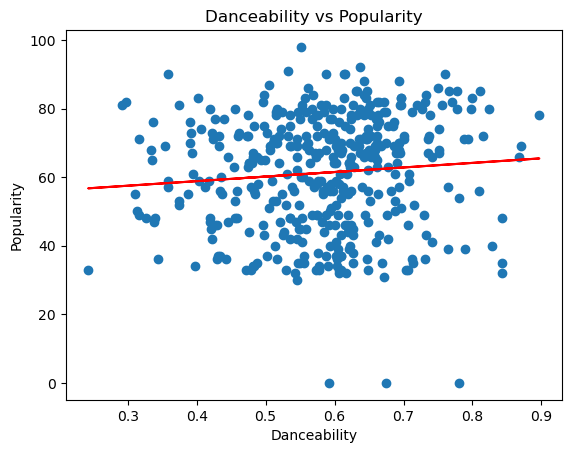

In [38]:
# fourth regression: danceability vs pop
dance_reg = linregplot(swift_df['danceability'], swift_df['popularity'], "Danceability", "Popularity")

In [39]:
# printing out all line eqs and rvalues together to compare these models all together
print(f'For valence vs popularity: r value is {valence_reg[1]:.3f} and line equation is {valence_reg[0]}')
print(f'For tempo vs popularity: r value is {tempo_reg[1]:.3f} and line equation is {tempo_reg[0]}')
print(f'For energy vs popularity: r value is {energy_reg[1]:.3f} and line equation is {energy_reg[0]}')
print(f'For danceability vs popularity: r value is {dance_reg[1]:.3f} and line equation is {dance_reg[0]}')

For valence vs popularity: r value is -0.052 and line equation is y = -4.39x + 63.03
For tempo vs popularity: r value is -0.006 and line equation is y = -0.00x + 61.68
For energy vs popularity: r value is -0.031 and line equation is y = -2.61x + 62.79
For danceability vs popularity: r value is 0.090 and line equation is y = 13.31x + 53.53


Answer: No, none of the variables used (valence, tempo, energy, danceability) are good predictors for popularity. All four regression lines look extremely flat, and the scatterplots show no meaningful trend. The r values for each are all between -0.1 and 0.1, indicating very weak correlation, if any at all. 
<br> This result is not necessarily surprising to me, as Taylor Swift has a number of popular songs across the range for all four of these values: high and low valence (ie, happy songs and sad songs), fast and slow, high and low energy, and very danceable and not very danceable. As a result, none of these metrics can be used to predict the popularity of a Taylor Swift song. 
<br> In terms of further research on this topic, one value which was not explored as a potential predictor for popularity was a song's inclusion in the Era's tour tracklist. The Era's tour is Taylor Swift's current tour, and fans reference anecdotally the effect that being present in this tour has on a track's popularity. This data is not tracked in this dataset, which is why it was not explored here, but the information is available, with the tracklist up online. Future research into predicting popularity could assemble that data and use that as a regressor on popularity, to see if inclusion in the Era's tour setlist can be a strong predictor for Spotify popularity.